# Multi-Layer Perceptrons

To solve more complicated problems, we need to add additional layers. There are several immediate questions to consider:
 - How many perceptrons do I need?
 - How many layers is sufficient?
 - Should the hidden layers be larger or smaller than the input layer?
 
This notebook will shed light on some of these questions through examples.

## XOR Problem

Let's start out by creating the data representing the XOR problem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calc_decision_boundary(weights):
    x = -weights[0] / weights[1]
    y = -weights[0] / weights[2]
    m = -y / x
    return np.array([m, y])

def gen_boundary_points(weights, m, b):
    # If the slope is undefined, it is vertical.
    if weights[2] != 0:
        x = np.linspace(-5, 5, 100)
        y = m * x + b
    else:
        x = np.zeros(100)
        y = np.linspace(-5, 5, 100) + b
        
    return x, y

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def dot(w, x):
    x_bias = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return w @ x_bias.T

In [ ]:
# Define XOR inputs -- prepend a constant of 1 for bias multiplication
samples = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
targets = np.array([0, 1, 1, 0])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(samples[:, 0], samples[:, 1], c=targets)

What was the result of using a single perceptron to solve this problem?

The most optimal outcome is 75\% accuracy.

In [ ]:
# Classifier Parameters
weights = np.array([-0.5, 1, 1]) 

# For visualizing the line
m, b = calc_decision_boundary(weights)

x, y = gen_boundary_points(weights, m, b)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='g')
ax.scatter(samples[:, 0], samples[:, 1], c=targets, cmap='bwr')
ax.set_xlim([-0.2, 1.2])
ax.set_ylim([-0.2, 1.2])

## Adding another perceptron

We begin by adding a hidden layer with a single perceptron having a sigmoidal, nonlinear activation function.

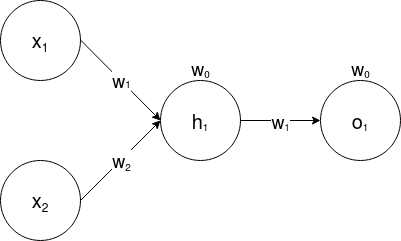

If the hidden layer has only a single unit that produces a scalar output, then the initialization of our output perceptron changes. The weight matrix defining the output perceptron must have a weight for each incoming input. Since the hidden layer output is of size 1, the output perceptron only has a single weight.

## Forward Pass

To compute the forward pass with a hidden layer, we must first transform the input into the hidden layer space before transforming the intermediate result into the output space.

$$y = \sigma(\mathbf{w}_o \cdot \sigma(\mathbf{w}_h \cdot \mathbf{x}))$$

We can write this in algorithmic form as

    layer_out = input
    
    for layer in layers:
        layer_out = layer(layer_out)
    
    return layer_out

In [ ]:
hidden_weights = np.array([-0.5, 1, 1])
out_weights = np.array([0, 1])

# For visualizing the line
hidden_m, hidden_b = calc_decision_boundary(hidden_weights)

hidden_x, hidden_y = gen_boundary_points(hidden_weights, hidden_m, hidden_b)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(hidden_x, hidden_y, c='g')
ax.scatter(samples[:, 0], samples[:, 1], c=targets)
ax.set_xlim([-0.2, 1.2])
ax.set_ylim([-0.2, 1.2])

A single perceptron in the hidden layer means that we still only have a single decision boundary. It seems intuitive at this point that adding another neuron would give us 2 different decision boundaries.

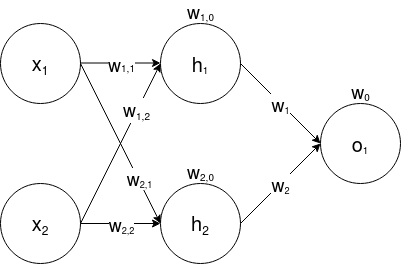

In [ ]:
# hidden_weights = np.random.uniform(-1, 1, size=(2, 3))
# out_weights = np.random.uniform(-1, 1, size=(3,))
hidden_weights = np.array([[-0.5, 1, 1], [-1.5, 1, 1]])
out_weights = np.array([-0.22, 1.0, -1.0])

# For visualizing the line
hidden_m0, hidden_b0 = calc_decision_boundary(hidden_weights[0])
hidden_x0, hidden_y0 = gen_boundary_points(hidden_weights[0], hidden_m0, hidden_b0)
hidden_m1, hidden_b1 = calc_decision_boundary(hidden_weights[1])
hidden_x1, hidden_y1 = gen_boundary_points(hidden_weights[1], hidden_m1, hidden_b1)
out_m, out_b = calc_decision_boundary(out_weights)
out_x, out_y = gen_boundary_points(out_weights, out_m, out_b)

# Forward propagation
hidden_out = dot(hidden_weights, samples)
hidden_act = sigmoid(hidden_out)
print("Hidden layer BEFORE non-linearity")
print(hidden_out)
print("Hidden layer AFTER non-linearity")
print(hidden_act)

c = hidden_act.mean(1)
h_min = hidden_act.min(1)
h_max = hidden_act.max(1)
b = np.abs(h_max - h_min).max()

# Visualize hidden layer space
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_title("Hidden Layer Space")
ax1.plot(out_x, out_y, c='g')
ax1.scatter(hidden_act[0, :], hidden_act[1, :], c=targets)
ax1.set_xlim([c[0] - b, c[0] + b])
ax1.set_ylim([c[1] - b, c[1] + b])

# Forward pass finishing with final neuron
out = dot(out_weights, hidden_act.T)
print("Output BEFORE non-linearity")
print(out)
out_act = sigmoid(out)
print("Output AFTER non-linearity")
print(out_act)    
    
# Visualize input space
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title("Input Space")
ax2.plot(hidden_x0, hidden_y0, c='g')
ax2.plot(hidden_x1, hidden_y1, c='g')
ax2.scatter(samples[:, 0], samples[:, 1], c=targets)
ax2.set_xlim([-0.2, 1.2])
ax2.set_ylim([-0.2, 1.2])